In [1]:
import torch
import torch.nn as nn
import numpy as np
import os
from star.pytorch.star import STAR
import pickle

In [2]:
with open('foot_f.obj', 'rb') as file:    # james.p 파일을 바이너리 읽기 모드(rb)로 열기
    foot_f = pickle.load(file)

gender = 'male'
filename='sample111.obj'

In [3]:
num_betas = 300
batch_size=1
poses = torch.FloatTensor(np.zeros((batch_size,72)))
betas = torch.FloatTensor(np.random.normal(loc=0.0, scale=1.0, size=(batch_size,num_betas)))
trans = torch.FloatTensor(np.zeros((batch_size,3)))
star_ = STAR(gender=gender,num_betas=num_betas)
print(poses.shape[0])
x = star_.forward(pose=poses , betas=betas , trans=trans)
shaped = x.v_shaped[-1, :, :]
shaped.numpy()[:, 1]

1


array([0.48604017, 0.4724095 , 0.46751887, ..., 0.4203982 , 0.42229965,
       0.41996768], dtype=float32)

In [4]:
thefile = open(filename, 'w')
for item in shaped:
  thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))

for item in foot_f:
  thefile.write("f {0}// {1}// {2}//\n".format(item[0][0],item[1][0],item[2][0]))  

thefile.close()

In [5]:
from obj2html import obj2html
from IPython.display import display, HTML

obj_path = 'test1.obj'

camera={
  "fov": 15,
  "aspect": 2,
  "near": 0.1,
  "far": 100,
  "pos_x": 0.4,
  "pos_y": -2,
  "pos_z": 0.05,
  "orbit_x": 0,
  "orbit_y": 20,
  "orbit_z": 0,
}
light={
  "color": "0xFFFFFF",
  "intensity": 0.5,
  "pos_x": 0.4,
  "pos_y": -1.075,
  "pos_z": 0.05,
  "target_x": 0,
  "target_y": 0,
  "target_z": 0,
}
obj_options={
  "scale_x": 10,
  "scale_y": 10,
  "scale_z": 10,
}

obj2html(obj_path, 'index.html', camera, light, obj_options)

display(HTML('index.html'))

In [6]:
foot_v_index=[]
for i in range(len(foot_f)):
    if (foot_f[i][0][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][0][0]-1)
    if (foot_f[i][1][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][1][0]-1)
    if (foot_f[i][2][0]-1) not in foot_v_index :
        foot_v_index.append(foot_f[i][2][0]-1)
        
foot_v = []
for i in range(len(foot_v_index)):
    foot_v.append(shaped[foot_v_index[i]])
    
x_=[]
y_=[]
z_=[]
for i in range(len(foot_v)):
    if (foot_v[i][1].item()<1 ) :
        x_.append(foot_v[i][0].item())
        y_.append(foot_v[i][1].item())
        z_.append(foot_v[i][2].item())



(-0.1, 0.2)

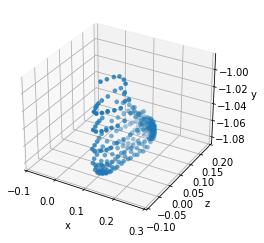

In [7]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_, z_, y_, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
plt.xlim(-0.1,0.3)
plt.ylim(-0.1,0.2)